In [51]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

from scipy.io import loadmat
mnist = loadmat(r"C:\Users\pulkit.goel\Desktop\mnist-original")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
mnist_data.shape


(70000, 784)

In [80]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist_data, mnist_label, test_size=1/7.0, random_state = 0)
test_img[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  23, 140, 25

In [53]:
# Standardize or scale the train data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# Apply  fit on training set only
scaler.fit(train_img)


# Apply transform to both training set and the test set
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)


C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
# Import and apply PCA model
from sklearn.decomposition import PCA

pca = PCA(.92)

pca.fit(train_img)


PCA(copy=True, iterated_power='auto', n_components=0.92, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [86]:
# Applying the mapping(tranform) to both train and test data
train = pca.fit_transform(train_img)
test = pca.fit_transform(test_img)
pca.n_components_
print(train.shape)
print(test.shape)

(60000, 106)
(10000, 105)


In [56]:
# Applying the Logistic regression


# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')


In [57]:
# Model is learning the relationship between digits and labels
logisticRegr.fit(train_img,train_lbl)


C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pulkit.goel\AppData\Loca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
# Predict for one observation
logisticRegr.predict(test_img[1].reshape(1,-1))


array([9.])

In [59]:
logisticRegr.predict(test_img[0:10])

array([1., 9., 2., 2., 7., 1., 8., 3., 3., 7.])

In [60]:
# Model Performance
logisticRegr.score(test_img,test_lbl)


0.9155

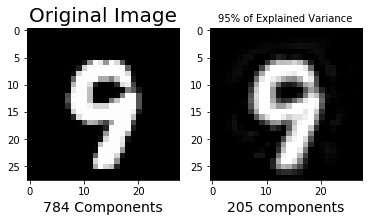

In [93]:
# Image Reconstruction from compressed Representation
from matplotlib import pyplot as plt
%matplotlib inline

approximation = pca.inverse_transform(test)



#original pic at 1st position in test set  
plt.subplot(1,2,1);
plt.imshow(test_img[1].reshape(28,28), cmap=plt.cm.gray, interpolation='nearest', clim=(0,255))
plt.xlabel('784 Components', fontsize = 14)
plt.title('Original Image', fontsize = 20)




# Reconstructed image at 1st position in test Set
plt.subplot(1,2,2)
plt.imshow(approximation[1].reshape(28,28), cmap=plt.cm.gray, interpolation='nearest', clim=(0,255))
plt.xlabel('205 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 10);